<a href="https://colab.research.google.com/github/kavyasree761/capstone-2-bike-sharing-prediction-analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
d= pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode escape')
d

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
d.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
d.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
d.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
d=d.rename(columns={'Rented Bike Count':'rented_bike_count',
                    'Temperature(°C)':'Temperature',
                    'Humidity(%)':'Humidity',
       'Wind speed (m/s)':'wind_speed',
        'Visibility (10m)':'visibility', 
        'Dew point temperature(°C)':'dew_point_temp',
       'Solar Radiation (MJ/m2)':'solar_radiation',
        'Rainfall(mm)':'rainfall', 
        'Snowfall (cm)':'snowfall',
        'Functioning Day':'functioning_day'})
d

,Date,rented_bike_count,Hour,Temperature,Humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,Seasons,Holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


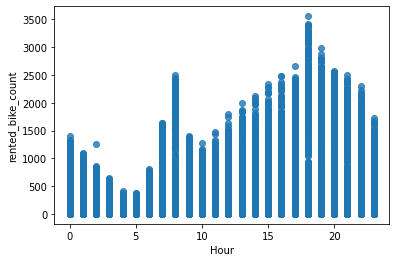

In [9]:
plt.scatter(d['Hour'],d['rented_bike_count'],alpha=0.8)
plt.ylabel('rented_bike_count')
plt.xlabel('Hour')
plt.show()

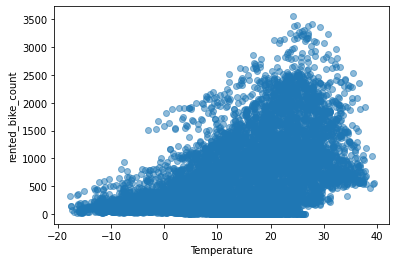

In [10]:
plt.scatter(d['Temperature'],d['rented_bike_count'],alpha=0.5)
plt.ylabel('rented_bike_count')
plt.xlabel('Temperature')
plt.show()

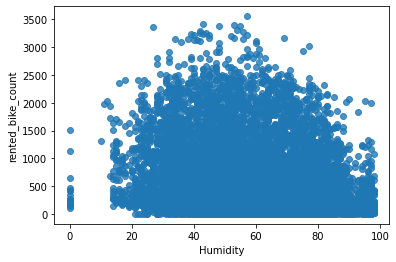

In [11]:
plt.scatter(d['Humidity'],d['rented_bike_count'],alpha=0.8)
plt.ylabel('rented_bike_count')
plt.xlabel('Humidity')
plt.show()

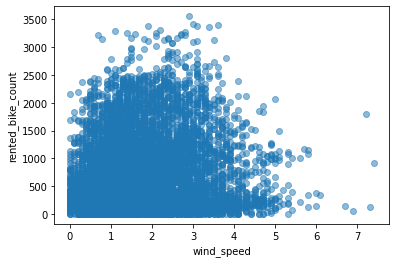

In [12]:
plt.scatter(d['wind_speed'],d['rented_bike_count'],alpha=0.5)
plt.ylabel('rented_bike_count')
plt.xlabel('wind_speed')
plt.show()

In [13]:
d['Holiday'] = np.where(d['Holiday']=='No Holiday', 1, 0)
d['functioning_day'] = np.where(d['functioning_day']=='Yes', 1, 0)
d['winter'] = np.where(d['Seasons']=='Winter', 1, 0)
d['summer'] = np.where(d['Seasons']=='Summer', 1, 0)
d['autumn'] = np.where(d['Seasons']=='Autumn', 1, 0)
d['spring'] = np.where(d['Seasons']=='Spring', 1, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


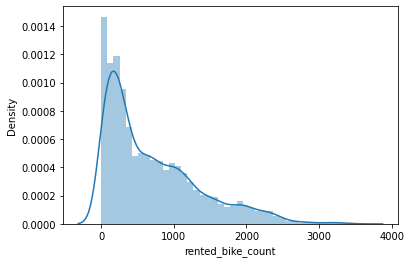

In [14]:

import seaborn as sns
sns.distplot(d.rented_bike_count)

In [15]:
d.drop(columns=['Seasons'],axis=1,inplace=True)
d.drop(columns=['Date'],axis=1,inplace=True)

In [16]:
dependent_variable = 'rented_bike_count'
independent_variables = list(set(d.columns.tolist()) - {dependent_variable})

In [17]:
X = d[independent_variables].values
y = d[dependent_variable].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
regressor.intercept_
regressor.coef_

array([-1088.18108158, -1954.39962834,  -200.92232969,   156.5674578 ,
          13.61797161,    34.33347888,   931.21350472,   144.27129796,
          30.73690029,   115.79557976,   629.45372903,   255.43620244,
         735.91116517,  -267.08676973,   824.42507609])

In [22]:
y_pred_train = regressor.predict(X_train)

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
y_pred

array([ 422.5538624 ,  767.19025326,  505.38033752, ...,  202.33733768,
       1185.53457009,  510.51580517])

In [25]:
y_test

array([ 320,  580,  226, ...,  213, 1331,  783])

In [26]:
mean_squared_error(y_test, y_pred)

190609.26508288065

In [27]:
math.sqrt(mean_squared_error(y_test, y_pred))

436.5882099677918

In [28]:
r2_score(y_train, y_pred_train)

0.5516435713892203

In [29]:
r2_score(y_test, y_pred)

0.5445663619093564

In [30]:
d['rented_bike_count'].mean()

704.6020547945205